In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [50]:
gdp = pd.read_csv('gdp.csv')

In [51]:
inv = pd.read_csv('inv.csv')

In [52]:
overall = pd.merge_ordered(gdp, inv)

In [53]:
overall

,Country,Year,GDP_g,Inflation_g,True Growth,Amount (2020 USD million)
0,Afghanistan,1961,NaN,NaN,0.0,NaN
1,Afghanistan,1962,NaN,NaN,0.0,NaN
2,Afghanistan,1963,NaN,NaN,0.0,NaN
3,Afghanistan,1964,NaN,NaN,0.0,NaN
4,Afghanistan,1965,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...
16994,Zimbabwe,2018,5.009867,200.769578,0.0,967.543716
16995,Zimbabwe,2019,-6.332446,225.394648,0.0,0.254309
16996,Zimbabwe,2020,-7.816951,604.945864,0.0,0.011643
16997,Zimbabwe,2021,8.468017,113.294981,0.0,NaN


In [54]:
others = pd.read_csv('others.csv')

In [55]:
others = others.rename(columns={'Country Name':'Country'})

In [56]:
overall = pd.merge_ordered(overall, others)

In [57]:
overall = pd.merge_ordered(overall, pd.read_csv('en_use.csv'))
#overall = overall.drop(overall[overall.Year > 2020].index)
#overall = overall.drop(overall[overall.Year < 2019].index)

In [58]:
overall.drop(columns=['True Growth', 'Amount (2020 USD million)', 'Alt. en. use', 'Overall en. use'], inplace=True)

In [59]:
overall

,Country,Year,GDP_g,Inflation_g,GHG,energy_use
0,Afghanistan,1960,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
17326,Zimbabwe,2018,5.009867,200.769578,29374.28664,NaN
17327,Zimbabwe,2019,-6.332446,225.394648,28697.16047,NaN
17328,Zimbabwe,2020,-7.816951,604.945864,25988.12599,NaN
17329,Zimbabwe,2021,8.468017,113.294981,NaN,NaN


In [60]:
overall.dropna(inplace=True, ignore_index = True)

In [61]:
overall

,Country,Year,GDP_g,Inflation_g,GHG,energy_use
0,Australia,2000,3.901171,2.560384,6.068608e+05,2545.70
1,Australia,2001,2.041417,4.620333,6.355300e+05,2554.74
2,Australia,2002,3.993590,2.844065,6.302350e+05,2553.62
3,Australia,2003,3.111398,2.967938,5.505632e+05,2654.80
4,Australia,2004,4.216633,3.237062,6.089257e+05,2722.53
...,...,...,...,...,...,...
475,United States,2016,1.667472,1.002235,6.003241e+06,54460.04
476,United States,2017,2.241921,1.899610,5.947835e+06,54939.22
477,United States,2018,2.945385,2.404059,6.154646e+06,56461.94
478,United States,2019,2.294439,1.793931,6.039739e+06,57239.83


In [62]:
#overall.to_excel('overall1.xlsx')

In [63]:
overall['Year'].value_counts()

Year
2010    24
2015    24
2019    24
2018    24
2017    24
2016    24
2011    24
2012    24
2013    24
2014    24
2005    23
2006    23
2007    23
2008    23
2009    23
2000    22
2001    22
2004    22
2003    22
2002    22
2020    15
Name: count, dtype: int64

In [16]:
year = pd.Categorical(overall.Year)

In [17]:
overall = overall.set_index(["Country", "Year"])
#overall["Year"] = year

In [18]:
overall['GDP_lag'] = overall.groupby('Country')['GDP_g'].shift(1)
overall.dropna(inplace=True)

In [19]:
overall.to_excel('overall1.xlsx')

In [20]:
corr = overall.corr(method = 'pearson', numeric_only=True)

In [21]:
corr

,GDP_g,Inflation_g,GHG,energy_use,GDP_lag
GDP_g,1.000000,0.233270,-0.019185,-0.031834,0.394699
Inflation_g,0.233270,1.000000,-0.016074,-0.038944,0.348440
GHG,-0.019185,-0.016074,1.000000,0.996700,-0.015834
energy_use,-0.031834,-0.038944,0.996700,1.000000,-0.025878
GDP_lag,0.394699,0.348440,-0.015834,-0.025878,1.000000


In [22]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

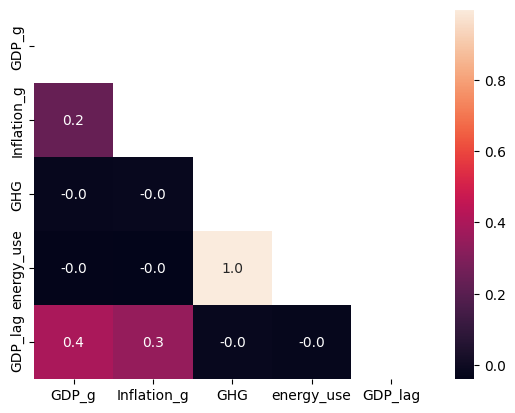

In [23]:
sns.heatmap(corr, mask=mask,  annot=True, fmt=".1f")

In [24]:
exog_vars = overall.columns.tolist()
exog_vars.pop(0)
exog_vars
#overall['GDP_g'] = np.log()

['Inflation_g', 'GHG', 'energy_use', 'GDP_lag']

In [25]:
exog = sm.add_constant(overall[exog_vars])

In [26]:
exog

const  Inflation_g           GHG  energy_use   GDP_lag
Country       Year                                                        
Australia     2001    1.0     4.620333  6.355300e+05     2554.74  3.901171
              2002    1.0     2.844065  6.302350e+05     2553.62  2.041417
              2003    1.0     2.967938  5.505632e+05     2654.80  3.993590
              2004    1.0     3.237062  6.089257e+05     2722.53  3.111398
              2005    1.0     3.824360  5.710569e+05     2747.80  4.216633
...                   ...          ...           ...         ...       ...
United States 2016    1.0     1.002235  6.003241e+06    54460.04  2.706370
              2017    1.0     1.899610  5.947835e+06    54939.22  1.667472
              2018    1.0     2.404059  6.154646e+06    56461.94  2.241921
              2019    1.0     1.793931  6.039739e+06    57239.83  2.945385
              2020    1.0     1.304912  5.505181e+06    50234.83  2.294439

[456 rows x 5 columns]

In [27]:
mod = PooledOLS(overall.GDP_g, exog)

In [28]:
pooled_res = mod.fit()

In [29]:
pooled_res

Dep. Variable:,GDP_g,R-squared:,0.1736
Estimator:,PooledOLS,R-squared (Between):,0.6418
No. Observations:,456,R-squared (Within):,0.0880
Date:,"Thu, Nov 16 2023",R-squared (Overall):,0.1736
Time:,19:53:30,Log-likelihood,-1088.1
Cov. Estimator:,Unadjusted,,
,,F-statistic:,23.683
Entities:,24,P-value,0.0000
Avg Obs:,19.000,Distribution:,"F(4,451)"
Min Obs:,10.0000,,
Max Obs:,20.000,F-statistic (robust):,23.683


In [30]:
from linearmodels.panel import RandomEffects

In [31]:
mod = RandomEffects(overall.GDP_g, exog)

In [32]:
re_res = mod.fit()
re_res

Dep. Variable:,GDP_g,R-squared:,0.1736
Estimator:,RandomEffects,R-squared (Between):,0.6418
No. Observations:,456,R-squared (Within):,0.0880
Date:,"Thu, Nov 16 2023",R-squared (Overall):,0.1736
Time:,19:53:30,Log-likelihood,-1088.1
Cov. Estimator:,Unadjusted,,
,,F-statistic:,23.683
Entities:,24,P-value,0.0000
Avg Obs:,19.000,Distribution:,"F(4,451)"
Min Obs:,10.0000,,
Max Obs:,20.000,F-statistic (robust):,23.683


In [33]:
re_res.variance_decomposition

Effects                   0.00000
Residual                  6.71254
Percent due to Effects    0.00000
Name: Variance Decomposition, dtype: float64

In [34]:
print(re_res.theta.max(), re_res.theta.min(), sep='\n')

theta    0.0
dtype: float64
theta    0.0
dtype: float64


In [35]:
from linearmodels.panel import BetweenOLS

In [36]:
exog = sm.add_constant(overall[exog_vars])
mod = BetweenOLS(overall.GDP_g, exog)
be_res = mod.fit(reweight=True) #панели несбалансированы?
be_res

Dep. Variable:,GDP_g,R-squared:,0.9691
Estimator:,BetweenOLS,R-squared (Between):,0.9654
No. Observations:,24,R-squared (Within):,-0.4085
Date:,"Thu, Nov 16 2023",R-squared (Overall):,-0.1995
Time:,19:53:30,Log-likelihood,4.7987
Cov. Estimator:,Unadjusted,,
,,F-statistic:,152.10
Entities:,24,P-value,0.0000
Avg Obs:,19.000,Distribution:,"F(4,19)"
Min Obs:,10.0000,,
Max Obs:,20.000,F-statistic (robust):,149.02


In [37]:
from linearmodels.panel import compare

In [38]:
print(compare({"BE": be_res, "RE": re_res, "Pooled": pooled_res}, stars=True))
#"RE": re_res,

                        Model Comparison                       
                                BE              RE       Pooled
---------------------------------------------------------------
Dep. Variable                GDP_g           GDP_g        GDP_g
Estimator               BetweenOLS   RandomEffects    PooledOLS
No. Observations                24             456          456
Cov. Est.               Unadjusted      Unadjusted   Unadjusted
R-squared                   0.9691          0.1736       0.1736
R-Squared (Within)         -0.4085          0.0880       0.0880
R-Squared (Between)         0.9654          0.6418       0.6418
R-Squared (Overall)        -0.1995          0.1736       0.1736
F-statistic                 152.10          23.683       23.683
P-value (F-stat)            0.0000          0.0000       0.0000
===================== ============ =============== ============
const                    -0.3534**       0.7127***    0.7127***
                         (-2.6866)      

In [39]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [40]:
residuals = re_res.resids
residuals

Country        Year
Australia      2001   -1.595904
               2002    1.316035
               2003   -0.120617
               2004    1.172259
               2005   -0.295696
                         ...   
United States  2016    0.549307
               2017    1.687947
               2018    2.031084
               2019    1.681814
               2020   -3.744374
Name: residual, Length: 456, dtype: float64

In [41]:
het_test = het_breuschpagan(residuals, exog_het=exog, robust=False)

In [42]:
het_test

(27.004048451326298,
 1.9841477577462293e-05,
 1.6463397831541156,
 0.16153056267633178)

In [43]:
residuals = pooled_res.resids
residuals

Country        Year
Australia      2001   -1.595904
               2002    1.316035
               2003   -0.120617
               2004    1.172259
               2005   -0.295696
                         ...   
United States  2016    0.549307
               2017    1.687947
               2018    2.031084
               2019    1.681814
               2020   -3.744374
Name: residual, Length: 456, dtype: float64

In [44]:
het_test = het_breuschpagan(residuals, exog_het=exog, robust=False)

In [45]:
het_test

(27.004048451326298,
 1.9841477577462293e-05,
 1.6463397831541156,
 0.16153056267633178)

In [46]:
import numpy.linalg as la

In [47]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [48]:
hausman(be_res, re_res)

(2464.656662500685, 5, 0.0)